# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', None)
display(data.head())
print(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В исследуемых данных 23699 записей, 22 столбца.\
Во многих колонках есть пропуски. Попробую разобраться что это за пропуски и как их можно заполнить. А также проверю типы данных в этих колонках и по какой причине их нужно заменить.

Пропущенные значения в столбцах:

ceiling_height — высота потолков (м). Множество выбросов по причине опечаток, возможно из-за ошибки пользователя, так как количество их небольшое.

floors_total — всего этажей в доме. Пропуски по причине - владельцы не заполнили эти данные. Необходимо перевести тип данных к целочисленному, так как количество этажей не может относится к вещественным.


is_apartment — апартаменты (булев тип). Пропуски по причине - владельцы не заполнили эти данные, уверены, что их недвижимость не относится к данному типу. Необходимо перевести к типу данных bool, потому что имеет значения True/False.

kitchen_area — площадь кухни в квадратных метрах (м²). Множество выбросов по причине опечаток, возможно из-за ошибки пользователя, так как количество их небольшое.

balcony — число балконов. Пропуски по причине - владельцы не заполнили эти данные, по приине отсутствия балконов. Необходимо перевести к типу данных bool, потому что имеет значения True/False.

locality_name — название населённого пункта. Пропуски заменить не представляется возможным.

airports_nearest — расстояние до ближайшего аэропорта в метрах (м). Пользователь не смог заполнить данные, так как не уверен в корректности собственных расчетов. Можно пропустить заполнение пропусков, так как не повлияет на исследование.

cityCenters_nearest — расстояние до центра города (м). Пользователь не смог заполнить данные, так как не уверен в корректности собственных расчетов.

parks_around3000 — число парков в радиусе 3 км. Необходимо перевести тип данных к целочисленному, так как число парков не может относится к вещественным.

parks_nearest — расстояние до ближайшего парка (м). Расстояния лучше заменить медианами по всему набору данных.

ponds_around3000 — число водоёмов в радиусе 3 км. Необходимо перевести тип данных к целочисленному, так как число водоёмов не может относится к вещественным.

ponds_nearest — расстояние до ближайшего водоёма (м). Расстояния лучше заменить медианами по всему набору данных.

days_exposition — сколько дней было размещено объявление (от публикации до снятия). Пропуски в 'days_exposition' возможны по причине, что на момент выгрузки обьявления были активны. Необходимо перевести тип данных к целочисленному, так как количество дней не может относится к вещественным.

Кроме того, необходимо изменить тип данных в колонке 'first_day_exposition' c object на datetime64, так как содержит в себе дату.

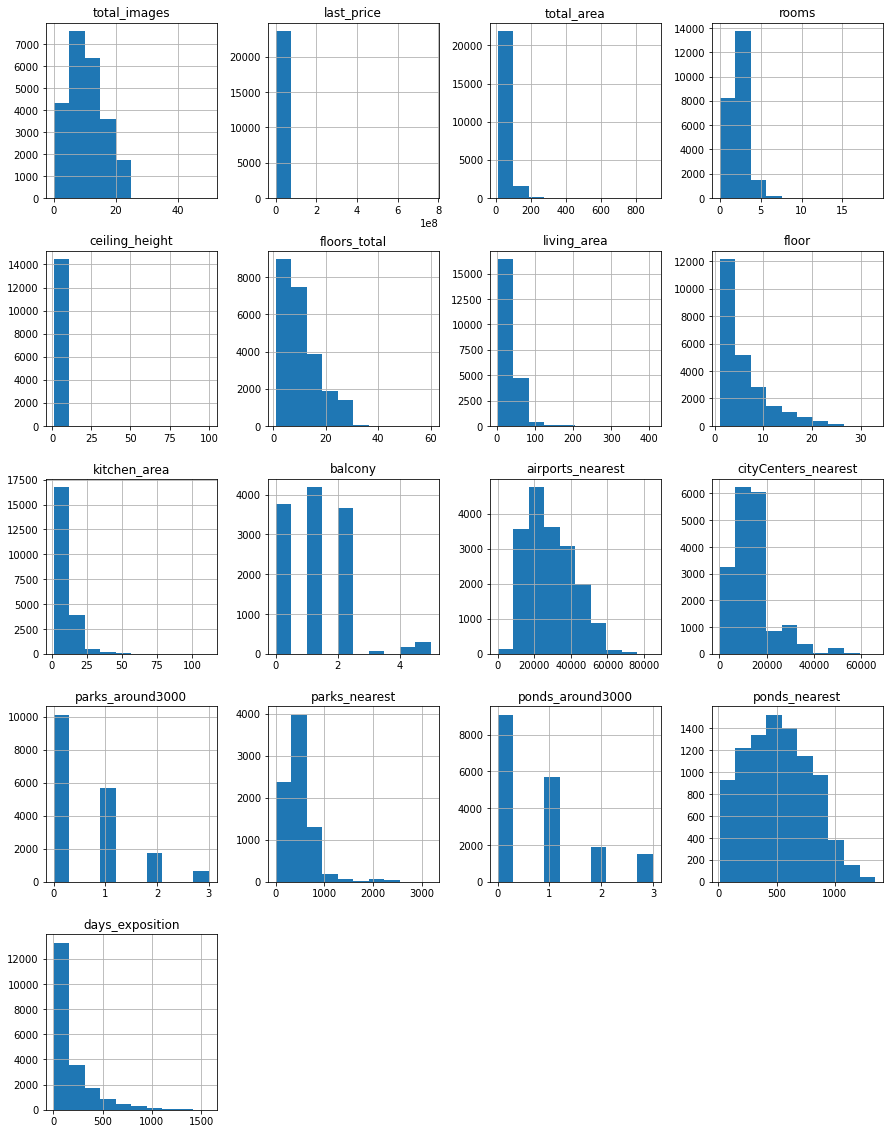

In [3]:
data.isna.sum()

### Предобработка данных

In [4]:
data['ceiling_height'] = np.where((data.ceiling_height > 10), data.ceiling_height/10, data.ceiling_height) 
#Исправление опечаток
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#Замена пропусков на медианные значения

In [5]:
data[data['ceiling_height'] < 2.5]['ceiling_height'].count() #Кол-во помещений с потолками меньше 2,5 м.

78

In [6]:
data[data['ceiling_height'] > 6]['ceiling_height'].count() #Кол-во помещений с потолками выше 6 м.

5

In [7]:
data[data['ceiling_height'].isnull()]['ceiling_height'].count() #проверка на наличие 0
data[data['ceiling_height'].isna()]['ceiling_height'].count() #проверка на наличие NaN

0

Исправили опечатки в записях с аномально выскоими значениями потолков. 
Заполнили пропуски медианными значениями.


Выбросы: \
В соответствии с СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные» установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м. Таких квартир - 78. \
Жилых помещений с потолками больше 6м - 5. \
Стандартное отклонение - 0.2. \
Считаю разумным заменить пропуски медианными значениями.

In [8]:
data[data['floors_total'].isnull()]['floor'].max() #24 этаж - максимальное значение
data['floors_total'] = data['floors_total'].fillna(24)

Заменим пропуски в колонке 'всего этажей в доме' максимальным значением, найденным среди квартир, у которых пропущено значение этажности в доме. Это сделано для того, чтобы указанная квартира не могла находиться выше, чем этажей в доме.

In [9]:
data.loc[(data['rooms'] == 0) & (data['studio'] == False), 'rooms'] = 1
data.loc[(data['rooms'] == 0) & (data['studio'] == True), 'rooms'] = 0

Изменяем значение с 0 на 1 у квартир, которые не являются студями.

In [10]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].median()

Заполнение пустых ячеек столбца 'living_area' медианными значениями столбца 'rooms'.

In [11]:
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True), 'kitchen_area'] = 0
#Заполнение пропусков для квартир-студий

for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == i), 'kitchen_area'].median()

Заполнение пустых ячеек столбца 'kitchen_area' медианными значениями столбца 'rooms'.

In [12]:
data['balcony'] = data['balcony'].fillna(0)

Продавцы в некоторых обьявлениях не указали число балконов, скорее всего, в квартирах их нет. \
Такие пропуски правильно заменить на 0

In [13]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].fillna(0))
#Замена пустых ячеек на 0
#Пропуски в 'days_exposition' возможны по причине, что на момент выгрузки обьявления были активны.

In [14]:
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median()) 

В данном случае, замена пустых значений на ноль не корректна. \
На ноль не стоит заменять никогда за исключением случаев, когда мы точно знаем, что пропуск - это ноль (как в случае с балконами). Расстояния лучше заменить медианами по всему набору данных.

In [15]:
for s in ['поселок ', 'посёлок ', 'деревня ', 'село ', 'городского типа ', 'садовое товарищество ', 'станции ', 'при железнодорожной ', 'городской ', 'коттеджный ', 'городской ', 'имени ', 'садоводческое некоммерческое товарищество ']:
     data['locality_name'] = data['locality_name'].str.replace(s, '')

Убираем неявные дубликаты местоположения. \
Заполнить пропуски в названии населенных пунктов не представляется возможным.

In [16]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Апартаменты (булев тип): True - 50 строк, False - 2725 строк \
Нет четких критериев, что можно отнести к апартаментам. \
Обычно владельцы апартаментов точно знают, что у них особая форма недвижимости и указывают ее. Если не указали, значит не апартаменты. \ 
Переводим тип данных в bool.

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
data['floors_total'] = data['floors_total'].round(0).astype('int')

In [19]:
data['parks_around3000'] = data['parks_around3000'].round(0).astype('int')

In [20]:
data['ponds_around3000'] = data['ponds_around3000'].round(0).astype('int')

In [21]:
data['days_exposition'] = data['days_exposition'].round(0).astype('int')

In [22]:
data['balcony'] = data['balcony'].round(0).astype('int')

In [23]:
data['balcony'] = data['balcony'].round(0).astype('int')

Изменяем типы данных: 
- 'is_apartment' - содержит значения True/False, что соответствует логическому типу данных. 
- 'first_day_exposition' - столбец с датой и временем, соответсвует типу данных datetime64. 
- Столбцы 'floors_total', 'parks_around3000', 'ponds_around3000', 'days_exposition', 'balcony' в исходных данных имели вещественный тип, перевод их в целочисленный тип данных считаю более разумным. 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Проверка внесенных изменений. \
Предобработка данных была выполнена в полном обьеме в соответствии с чек-листом.

### Посчитайте и добавьте в таблицу новые столбцы

In [25]:
data['price_m'] = round(data['last_price'] / data['total_area'], 1)
#Цена одного квадратного метра

In [26]:
data['weekday'] = data['first_day_exposition'].dt.weekday
#День публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [27]:
data['month'] = data['first_day_exposition'].dt.month
#Месяц публикации объявления

In [28]:
data['year'] = data['first_day_exposition'].dt.year
#Год публикации объявления

In [29]:
def floors_flat(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

data['floors_flat'] = data.apply(floors_flat, axis=1) 
#Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [30]:
data['cityCenters_nearest_km'] = round((data['cityCenters_nearest'] / 1000), 1)
#Создание столбца с расстоянием в км до центра города
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
#Изменение типов данных

In [31]:
data.head() #Значения посчитаны, новые столбцы добавлены

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,weekday,month,year,floors_flat,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.4,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.8,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.7,3,8,2015,другой,13
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,True,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.1,4,7,2015,другой,6
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,другой,8


### Проведите исследовательский анализ данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

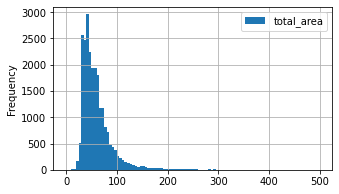

In [32]:
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(5,3), range=(0,500))
data['total_area'].describe()

#Строим гистограммы по основным показателям 

count    23699.000000
mean        34.321914
std         21.700678
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

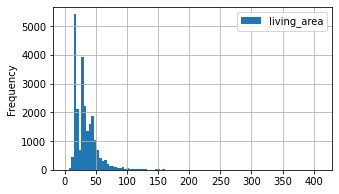

In [33]:
data.plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(5,3))
data['living_area'].describe()

count    23699.000000
mean        10.394335
std          5.701706
min          0.000000
25%          7.200000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

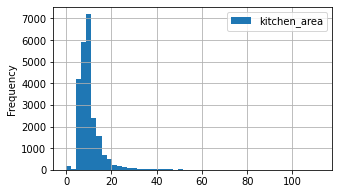

In [34]:
data.plot(y='kitchen_area', kind='hist', bins=50, grid=True, figsize=(5,3))
data['kitchen_area'].describe()
#data['kitchen_area'].unique()

count    23699.000000
mean         2.073125
std          1.074770
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

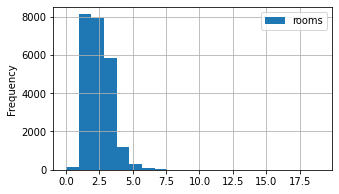

In [35]:
data.plot(y='rooms', kind='hist', grid=True, bins=20, figsize=(5,3))
data['rooms'].describe()

count    23699.000000
mean         2.697798
std          0.237643
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

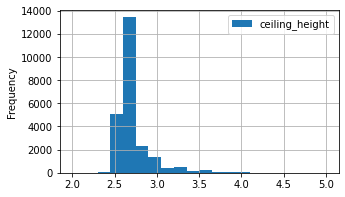

In [36]:
data.plot(y='ceiling_height', kind='hist', grid=True, bins=20, range=(2,5), figsize=(5,3))
data['ceiling_height'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

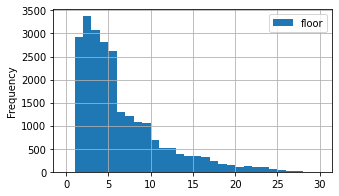

In [37]:
data.plot(y='floor', kind='hist', grid=True, bins=30, range=(0,30), figsize=(5,3))
data['floor'].describe()

count    23699.000000
mean        10.722182
std          6.633768
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

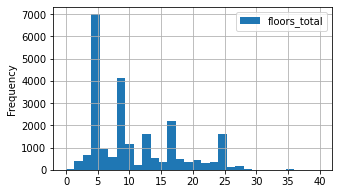

In [38]:
data.plot(y='floors_total', kind='hist', grid=True, bins=30, range=(0, 40), figsize=(5,3))
data['floors_total'].describe()

После изучения гистограмм, можно сделать вывод, что присутствует нормальное распределение данных. \
Стандартное отклонение по изученным данным от 0,2 до 35,6 в показателе 'общая площадь квартиры (м²)', что показывает, на сколько значения в выборке отличаются от среднего арифметического. То есть, в этом наборе данных присутствуют выбросы. \
Из архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах можем сделать вывод, что площадь квартир находится в диапазоне от 12 до 900 м², большинство из них - это квартиры с площадью 60 м². \
В популярных квартирах, площадь жилой зоны составляет - 30-40 м² (средняя - 34,2). \
Большинство квартир, не обладает большими обьемами, средний размер кухни - 10,4 м². \
Комнат в среднем 2, самые популярные варианты 1-3 комнаты. Но есть вариант с 19 комнатами. \
Потолки на стандартном уровне - 2,7 м. \
Меньше всего люди предпочитают высокие этажи. Наиболее предпочтительный вариант - 1-4 этаж. \
Большинство квартир продается в стандартных панельках 5-и и 9-и этажей.

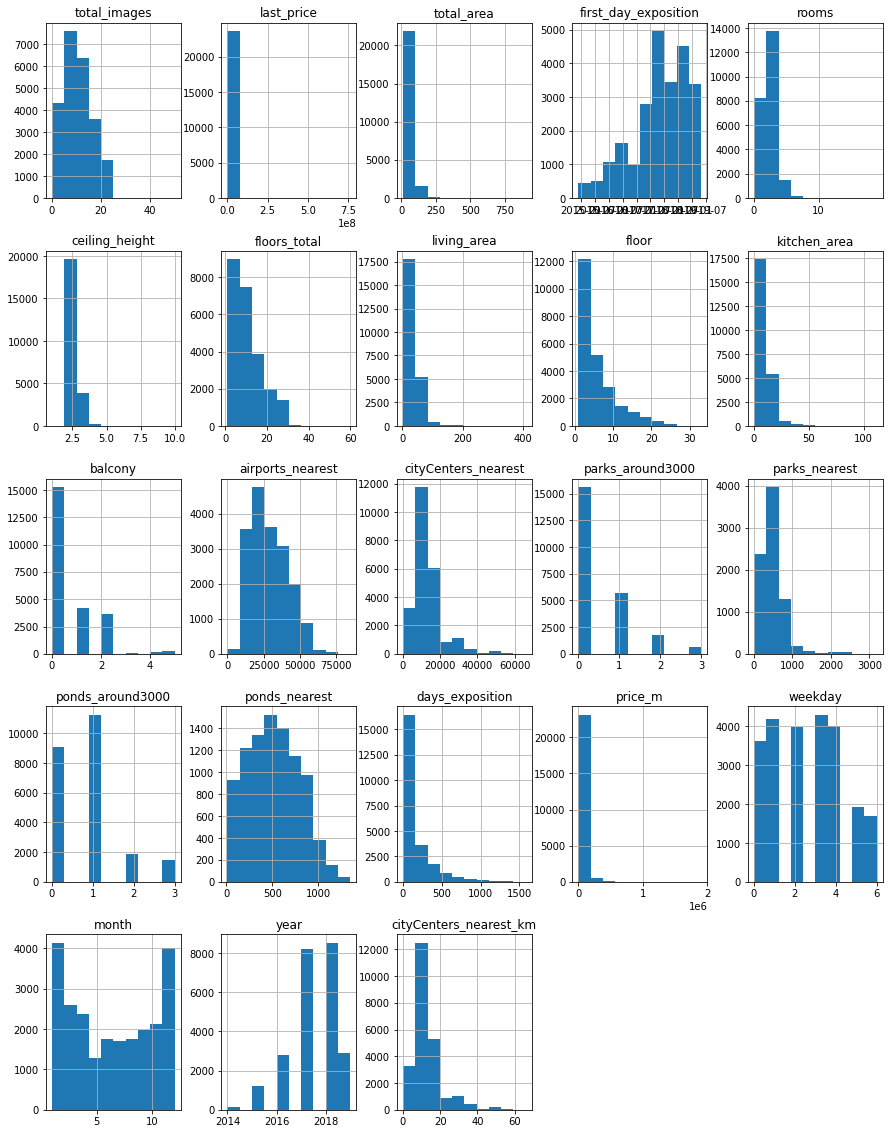

In [39]:
data.hist(figsize=(15, 20))
plt.show()

Как быстро продавались квартиры (столбец days_exposition)

(1.0, 1000.0)

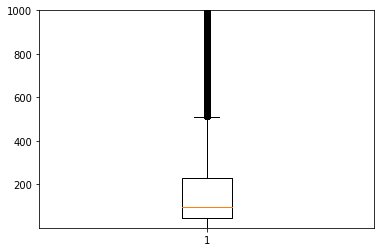

In [40]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)
#Строим диаграмму размаха

<AxesSubplot:ylabel='Frequency'>

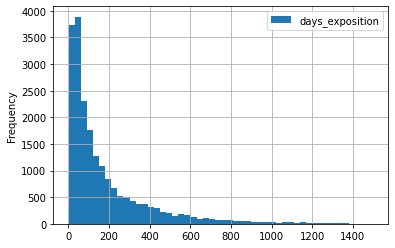

In [41]:
data.plot(y='days_exposition', kind='hist', bins=50, grid=True, range=(1,1500))
#строим гистограмму с значенями 1-1500, корзины-50

<AxesSubplot:ylabel='Frequency'>

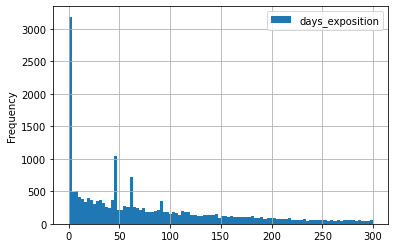

In [42]:
data.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(0,300))
#строим гистограмму с значенями 0-300, корзины-100

In [43]:
data[data['days_exposition']!=0]['days_exposition'].describe()
#среднее значение = 180,9. Медиана = 95 

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [44]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()
#Выделяются 5 групп аномалий - 45, 60, 7, 30, 90

45      880
60      538
7       234
30      208
90      204
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1141, dtype: int64

Выделены аномалии - Дни, когда больше всего снимается обьявлений. \
Правилами Я.Недвижость установлены сроки публикации обьявлений: \
Для Москвы, Санкт-Петербурга и их областей: Продажа	- 120 дней, Аренда длительная - 90 дней, Аренда посуточная - 120 дней. Платное объявление - 30 дней. \
Для регионов: Продажа - 45 дней, 90 дней, 60 дней. А для аренды - 7 дней, 30 дней, 60 дней.

Так же есть правило, что на 31-й день платного размещения включится автопродление. Отключить автопродление нельзя, просто снимите объявление с публикации, если оно больше неактуально. \
Можно сделать вывод, что большинство обьявлений размещены бесплатно и снимаются автоматически. \
Необходимо отделить автоматически снятые обьявления от тех, которые совпали с реальными продажами.

In [45]:
sale_days_exposition = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

(1.0, 1000.0)

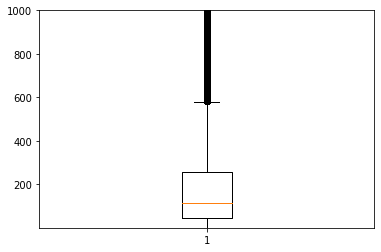

In [46]:
#строим диаграмму размаха
plt.boxplot(sale_days_exposition['days_exposition'])
plt.ylim(1,1000)

<AxesSubplot:ylabel='Frequency'>

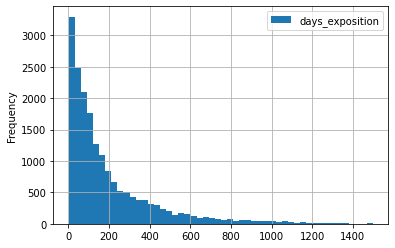

In [47]:
#строим гистограмму с значенями 1-1400, корзины-50
sale_days_exposition.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1,1500))

<AxesSubplot:ylabel='Frequency'>

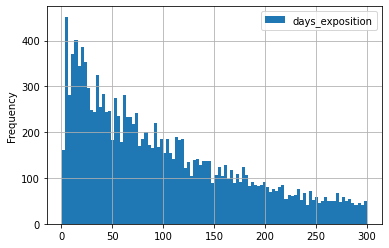

In [48]:
#строим гистограмму с значенями 1-300, корзины-100
sale_days_exposition.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,300))

In [49]:
sale_days_exposition['days_exposition'].value_counts()

4       176
3       158
5       152
14      148
9       143
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1136, dtype: int64

In [50]:
sale_days_exposition['days_exposition'].describe()
#среднее значение - 114
#медиана - 195,8 

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

Сложно найти четкие критерии для определения быстрых и медленных продаж.\
На основании исследуемых данных, можно сделать вывод, что в среднем продажа занимает 2,5 месяца.\
Быстрыми продажи можно считать в течении 1-1.5 месяцев, а необычно долгими - больше года(около 15 месяцев). \
После удаления аномалий среднее значение уменьшилось почти на 60%, а медианное значение увеличилось больше чем в 2 раза.


 "Какие факторы больше всего влияют на общую (полную) стоимость объекта"

<AxesSubplot:xlabel='total_area'>

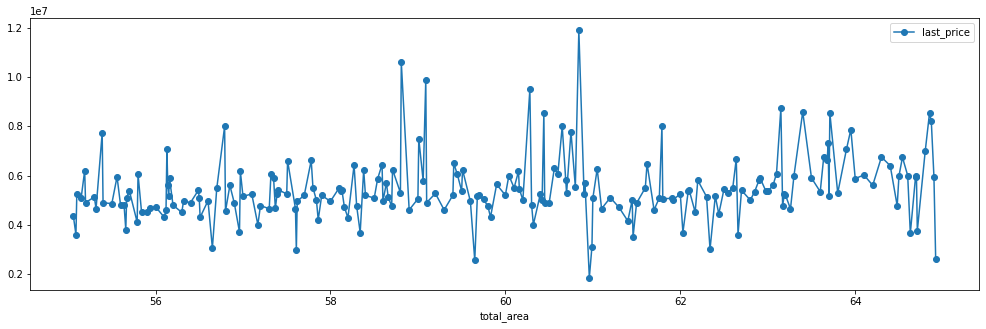

In [51]:
data.query('55 < total_area < 65')\
    .pivot_table(index='total_area', values='last_price', aggfunc='median')\
    .plot(style = 'o-', figsize=(17,5)) 

#Создаем фильтр в пределах медианного значения
#Создаем сводную таблицу по столбцу 'total_area', значения - 'last_price'.
#Строим график 17x5 для большей наглядности

In [64]:
data['total_area'].corr(data['last_price'])
#Зависимость цены от общей площади очень слабая(0.6). Большая площадь не сильно увеличивает цену.

0.6536750579657242

<AxesSubplot:xlabel='living_area'>

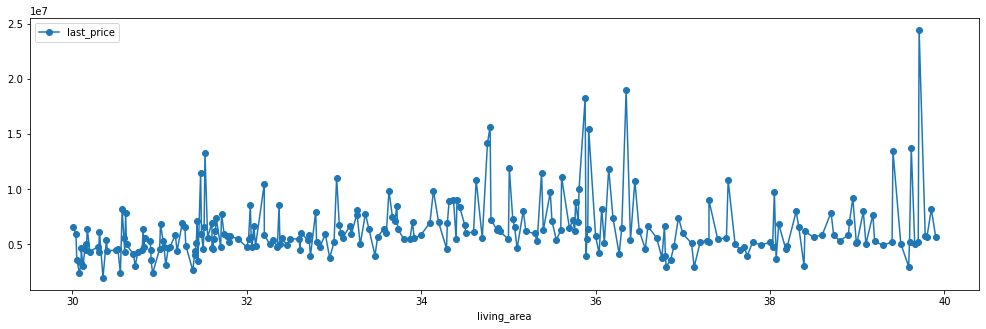

In [65]:
data.query('30 < living_area < 40')\
    .pivot_table(index='living_area', values='last_price', aggfunc='median')\
    .plot(style='o-', figsize=(17,5))

In [66]:
data['living_area'].corr(data['last_price'])
#Зависимость цены от общей площади очень слабая(0.6). Большая площадь не сильно увеличивает цену.

0.556061189383346

<AxesSubplot:xlabel='kitchen_area'>

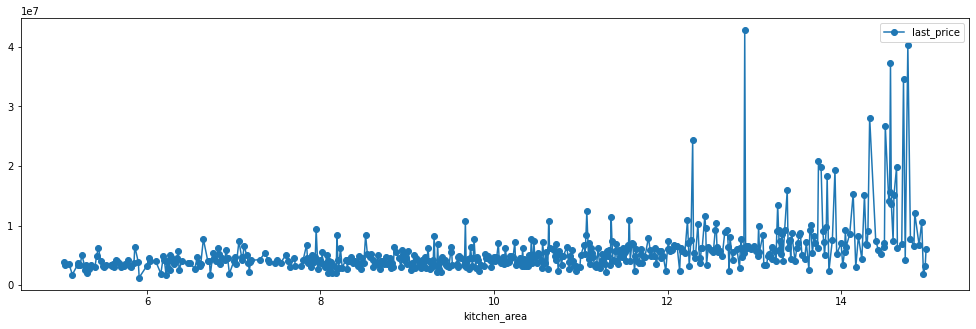

In [67]:
data.query('5 < kitchen_area < 15')\
    .pivot_table(index='kitchen_area', values='last_price', aggfunc='median')\
    .plot(style='o-', figsize=(17,5))

In [68]:
data['kitchen_area'].corr(data['last_price'])
#Зависимость цены от общей площади очень слабая(0.4). Большая площадь не сильно увеличивает цену.

0.4522376758096617

<AxesSubplot:xlabel='rooms'>

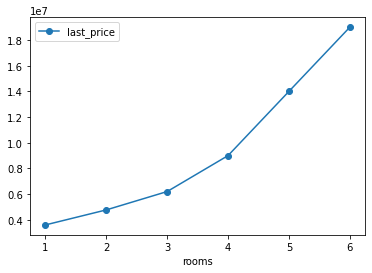

In [69]:
data.query('0 < rooms < 7')\
    .pivot_table(index='rooms', values='last_price', aggfunc='median')\
    .plot(style='o-')

In [70]:
data['rooms'].corr(data['last_price'])
#Чем больше комнат, тем больше цена. Прямая зависимость цены от кол-ва комнат.

0.36401203449989256

<AxesSubplot:xlabel='floors_flat'>

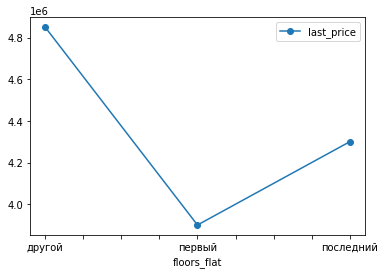

In [71]:
data.pivot_table(index='floors_flat', values='last_price', aggfunc='median')\
    .plot(style='o-')
#Меньше всего на рынке готовы платить за квартиру на первом этаже. Если это последний этаж, то немного больше.
#Квартиры с высокой стоимостью за кв. м. находятся приблизительно на средних этажах.

<AxesSubplot:xlabel='weekday'>

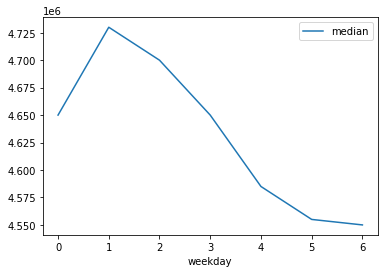

In [72]:
month_exp = data.pivot_table(index='weekday', values='last_price', aggfunc=['median', 'count'])
month_exp.columns = ['median', 'count']
month_exp.plot(y='median')

Самая высокая стоимость обьявлений приходится на вторник, самая низкая на воскресенье.\
Для такого распределения возможна причина в том, что люди вступают в начало недели с новыми силами и готовы менять жизнь.\
Однако чем ближе выходные, тем потребность в продаже квартиры уменьшается. Так как в пятницу вечером люди планируют отдых и их фокус смещается. Им больше это не интересно или некогда, а в понедельник, после отдыха снова задумываются об этом.

<AxesSubplot:xlabel='month'>

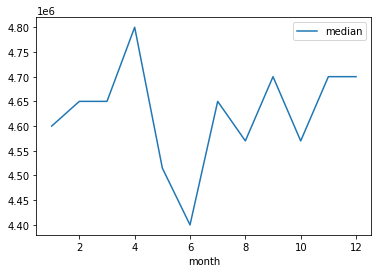

In [73]:
month_exp = data.pivot_table(index='month', values='last_price', aggfunc=['median', 'count'])
month_exp.columns = ['median', 'count']
month_exp.plot(y='median')

Самая высокая стоимость обьявлений приходится на апрель, сентябрь, ноябрь и декабрь. Самая низкая на май и июнь.\
Скорее всего это может быть связано с несколькими причинами:
1. Ежегодное повышение цен с нового года и удержание цены до марта.
2. В мае - июне происходит снижение спроса ввиду смещения приоритетов(в том числе отпусков и выпускных). 
3. Август приносит оживление рынка недвижимости и рост цен на квартиры. Cпрос начинает расти, в связи с тем, что начинается учебный период и многие студенты приезжают/переезжают в Санкт-Петербург.\
Можно сделать вывод, что май-июнь - самое лучшее время для покупки.

<AxesSubplot:xlabel='year'>

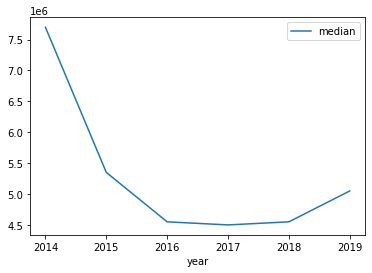

In [74]:
month_exp = data.pivot_table(index='year', values='last_price', aggfunc=['median', 'count'])
month_exp.columns = ['median', 'count']
month_exp.plot(y='median')

На основании графика видим, что снижение цен на нидвижимость начало происходить в 2014.\
Возможные причины: мировой кризис, рост валют, падение цен на нефть, экономические санкции.\
Рынок недвижимости отреагировал сокращением спроса, уменьшением рублевых цен, которые с учетом падения уровня жизни фактически выросли для большинства покупателей.\
Оживление рынка приходится на 2018 год, медленная стабилизация ситуации, увеличение средней цены 1 кв., покупка недвижимости для сохранения накопленных средств.

In [ ]:
#Группируем обьявления по населённым пунктам с наибольшим числом объявлений.
data.groupby('locality_name').agg({'total_images': 'count', 'price_m': 'mean'})\
    .rename(columns = {'total_images': 'Число обьявлений', 'price_m': 'Цена за 1 кв.м.'})\
    .sort_values(by = 'Число обьявлений', ascending = False).head(10)

Из 10 населённых пунктов с наибольшим числом объявлений:\
Самая высокая цена за кв. м. в Санкт-Петербурге - 114,8 \
Самая низкая цена за кв. м. в Выборге - 58,1

Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [ ]:
data['cityCenters_nearest_km'].describe()

In [ ]:
#Отфильтруем обьявления по Петербургу и создадим сводную таблицу с средним значением цены за кв. м.
spb_km =\
    data.query('locality_name == "Санкт-Петербург"')\
        .pivot_table(index='cityCenters_nearest_km', values='price_m', aggfunc='mean')
spb_km.columns = ['Цена за 1 кв.м.']
spb_km.sort_values(by='cityCenters_nearest_km')

In [ ]:
spb_km.plot()

Особенно важным фактором, оказывающим влияние на стоимость объекта недвижимости, является его расположение.\
На графике наглядно видно, чем ближе местонахождение обьекта к центру города, тем цена за квадратный метр больше. Цена за 1 кв.м. больше 100 т.р. в пределах 10 км центра города.\
Местоположение, как правило, наиболее существенный и динамичный фактор, который влияет на стоимость объекта и который трудно поддается объективному описанию. Для многих людей местоположение является самым наиболее важным условием при выборе объекта недвижимости.\
Существуют множество параметров, по которым можно охарактеризовать местоположение.\
Влияние местоположения можно разделить на: 
- Близость объекта недвижимости к центру города.
- Его непосредственное окружение.

В долгосрочном плане стоимость недвижимости зависит не только от влияния местоположения, по и оттого, насколько они меняются со временем.

### Общий вывод

При проведении исследования и работы с данными, была изучена информация, предоставленная сервисом Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
- Выполнена предобработка данных. В том числе удаление пропусков, заполненение пропущенных и аномальных значений, изменение типов данных, обработка дубликатов, исправление опечаток, посчитаны и добавлены новые значения в таблицу.
- Проведен исследовательский анализ данных. Найдены интересные особенности и зависимости, которые существуют на рынке недвижимости.
При проведении исследования данных, я использовал различные методы, в том чиле сводные таблицы, группировку данных, а так же визуализировал данные. На основании проанализированной информации, мной были изучены основные параметры обьектов недвижимости.

Так же я выявил: 
1. Как быстро продавались квартиры.
2. Какие факторы больше всего влияют на общую стоимость объекта.
4. Как стоимость объектов зависит от расстояния до центра города.
3. Среднюю цену одного квадратного метра в населённых пунктах с наибольшим числом объявлений.

Кроме того, было выявлено, что много бесплатных объявлений было автоматически удалено с сервиса Я.Недвижимость и дату их удаления нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались.

Стоимость объекта недвижимости моделируется в зависимости от влияния большого количества разнообразных факторов.\
Важными факторами, оказывающими влияние на стоимость объекта недвижимости, является его расположение (близость к центру), количество комнат, этажность.

Было выявлено, что в большинстве своем продаются квартиры среднего размера около 60 м² с 1-2 комнатами, наиболее встречающийся этаж - 2-4.\
Самая высокая стоимость обьявлений приходится на вторник, самая низкая на воскресенье.\
Дороже всего недвижимость продается в апреле, сентябре, ноябре и декабре. Наиболее выгодную покупку можно совершить в мае и июне.\
В среднем продажа занимает 2,5 месяца, самые интересные варианты приобретают в течении 1-1.5 месяцев.

Наибольшее число обьявлений размещают владельцы недвижимости в Санкт-Петербурге, где самая большая стоимость квадратного метра по всей области.
Кроме того, было выявлено, что с 2014г., в связи с началом мирового кризиса, начался упадок на рынке недвижимости, который более менее начал стабилизироваться в 2018г.

По времени стоимость объекта недвижимости может изменяться не равномерно, а скачкообразно из-за неблагоприятного влияния множества факторов. В этом случае важно уметь спрогнозировать изменение стоимости недвижимости при оценке.